## 类和对象

### 关键字

在Python中，定义类是通过class关键字：

In [55]:
class Student(object):
    pass

### 对象实例

In [58]:
bart = Student()
print(bart)

bart.name = 'Bart Simpson'        # 添加属性
print(bart.name)

Bart Simpson


### \_init_

由于类可以起到模板的作用，因此，可以在创建实例的时候，把一些我们认为必须绑定的属性强制填写进去。通过定义一个特殊的__init__方法，在创建实例的时候，就把name，score等属性绑上去：
**********
注意：特殊方法“__init__”前后分别有两个下划线！！！

- __init__方法的第一个参数永远是self，表示创建的实例本身，因此，在__init__方法内部，就可以把各种属性绑定到self，因为self就指向创建的实例本身。
- 有了__init__方法，在创建实例的时候，就不能传入空的参数了，必须传入与__init__方法匹配的参数，但self不需要传，Python解释器自己会把实例变量传进去

In [59]:
class Student(object):
    def __init__(self, name, score):
        self.name = name
        self.score = score
bart = Student('Bart Simpson', 59)
print(bart.name)
print(bart.score)

Bart Simpson
59


- 和普通的函数相比，在类中定义的函数只有一点不同，就是第一个参数永远是实例变量self，并且，调用时，不用传递该参数。
- 除此之外，类的方法和普通函数没有什么区别，所以，你仍然可以用默认参数、可变参数、关键字参数和命名关键字参数。

### 数据封装

面向对象编程的一个重要特点就是数据封装。在上面的Student类中，每个实例就拥有各自的name和score这些数据。我们可以通过函数来访问这些数据，比如打印一个学生的成绩。

但是，既然Student实例本身就拥有这些数据，要访问这些数据，就没有必要从外面的函数去访问，可以直接在Student类的内部定义访问数据的函数，这样，就把“数据”给封装起来了。这些封装数据的函数是和Student类本身是关联起来的，我们称之为类的方法。

In [60]:
class Student(object):

    def __init__(self, name, score):
        self.name = name
        self.score = score

    def print_score(self):
        print('%s: %s' % (self.name, self.score))

In [62]:
bart = Student('Bart Simpson', 59)
bart.print_score()

Bart Simpson: 59


### 总结

- 类是创建实例的模板，而实例则是一个一个具体的对象，各个实例拥有的数据都互相独立，互不影响；

- 方法就是与实例绑定的函数，和普通函数不同，方法可以直接访问实例的数据；

- 通过在实例上调用方法，我们就直接操作了对象内部的数据，但无需知道方法内部的实现细节。

## 正则表达式

字符串是编程时涉及到的最多的一种数据结构，对字符串进行操作的需求几乎无处不在。比如判断一个字符串是否是合法的Email地址，虽然可以编程提取@前后的子串，再分别判断是否是单词和域名，但这样做不但麻烦，而且代码难以复用。
************
正则表达式是一种用来匹配字符串的强有力的武器。它的设计思想是用一种描述性的语言来给字符串定义一个规则，凡是符合规则的字符串，我们就认为它“匹配”了，否则，该字符串就是不合法的。
所以我们判断一个字符串是否是合法的Email的方法是：
1. 创建一个匹配Email的正则表达式；
2. 用该正则表达式去匹配用户的输入来判断是否合法。
****************
因为正则表达式也是用字符串表示的，所以，我们要首先了解如何用字符来描述字符。
- 在正则表达式中，如果直接给出字符，就是精确匹配。
- \d可以匹配一个数字
- \s匹配空格
- \w可以匹配一个字母或数字
- .可以匹配任意字符
- *表示任意个字符（0个）
- \+ 表示至少一个字符
- ? 表示0/1个字符
- {n}表示n个字符
- {n,m}表示n-m个字符
*************
进阶：
- 可以用[]表示范围：
    - [0-9a-zA-Z\_]可以匹配一个数字、字母或者下划线；
    - [0-9a-zA-Z\_]+可以匹配至少由一个数字、字母或者下划线组成的字符串，比如'a100'，'0_Z'，'Py3000'等等；
    - [a-zA-Z\_][0-9a-zA-Z\_]*可以匹配由字母或下划线开头，后接任意个由一个数字、字母或者下划线组成的字符串，也就是Python合法的变量；
    - [a-zA-Z\_][0-9a-zA-Z\_]{0, 19}更精确地限制了变量的长度是1-20个字符（前面1个字符+后面最多19个字符）。
- A|B可以匹配A或B，所以(P|p)ython可以匹配'Python'或者'python'。
- ^表示行的开头，^\d表示必须以数字开头。
- $ 表示行的结束，\d $ 表示必须以数字结束。

## re模块

我们可以在Python中使用正则表达式。Python提供re模块，包含所有正则表达式的功能。由于Python的字符串本身也用\转义，所以要特别注意使用**r**表示字符串。

- re.match:  尝试从字符串的起始位置匹配一个模式，如果不是起始位置匹配成功的话，match()就返回none。返回值为re.match对象，有以下方法:
    - group:方法用于获得一个或多个分组匹配的字符串，当要获得整个匹配的子串时，可直接使用 group() 或 group(0)；
    - start：方法用于获取分组匹配的子串在整个字符串中的起始位置
    - end： 方法用于获取分组匹配的子串在整个字符串中的结束位置
    - span：方法返回 (start(group), end(group))。
- re.search:  扫描整个字符串并返回第一个成功的匹配。
- re.sub:    替换字符串中的匹配项。
- re.compile: 编译正则表达式，生成一个正则表达式（ Pattern ）对象，供 match() 和 search() 这两个函数使用。
- re.findall: 在字符串中找到正则表达式所匹配的所有子串，并返回一个列表，如果没有找到匹配的，则返回空列表。
- re.finditer:和 findall 类似，在字符串中找到正则表达式所匹配的所有子串，并把它们作为一个迭代器返回。
- re.split:按照能够匹配的子串将字符串分割后返回列表，它的使用形式如下：

In [27]:
import re
a = re.match(pattern= r'www.*.com', string= r'www.baidu.com')   
# pattern为正则表达式, string为要匹配的字符串,返回值为re。match对象，包括span和match方法
print(a)

b = re.search(pattern= r'www', string= r'www.baidu.com')
print(b)

phone = "2004-959-559 # 这是一个国外电话号码"
c = re.sub(pattern=r'#.*$', repl="", string= phone)   # 将注释以及之后的任意字符并结尾的部分替换为空，即删除
print(c)

c = re.sub(pattern=r'\D', repl="", string= phone)   # 将非数字部分替换为空，即删除
print(c)

p = re.compile(pattern=r'\d+')
d = p.match('one12twothree34four') 
print(d)
d = p.search('one12twothree34four') 
print(d)

print(d.group())
print(d.start())
print(d.end())
print(d.span())

e = re.findall(r'\d+', string= r'runoob 123 google 456')
print(e)

e = re.finditer(r'\d+', string= r'runoob 123 google 456')
print(e)
for match in e:
    print(match)

f = re.split('(\W+)', 'runoob, runoob, runoob.')
print(f)

<re.Match object; span=(0, 13), match='www.baidu.com'>
<re.Match object; span=(0, 3), match='www'>
2004-959-559 
2004959559
None
<re.Match object; span=(3, 5), match='12'>
12
3
5
(3, 5)
['123', '456']
<re.Match object; span=(7, 10), match='123'>
<re.Match object; span=(18, 21), match='456'>
['runoob', ', ', 'runoob', ', ', 'runoob', '.', '']


## datetime模块

datetime是Python处理日期和时间的标准库。
************


In [51]:
from datetime import datetime, timedelta
print(datetime.now())
print(type(datetime.now()))

#a = datetime(2020,20,20,20,20)   # 返回错误month必须为1-12
a = datetime(2020,12,20,20,20)
print(a)

a = a.timestamp()  # datetime转换为timestamp
print(a)

print(datetime.fromtimestamp(a))      # timestamp转换为datetime
print(datetime.utcfromtimestamp(a))   # timestamp转换为utc-datetime

d = datetime.strptime('2015-6-1 18:19:59', '%Y-%m-%d %H:%M:%S')   # 字符串转换为datetime
print(d)
print(type(d))

print(d.strftime("'%a, %b %d %H:%M'"))      # datetime转换为字符串

print(d + timedelta(days = 1, hours = 1))  # datetime运算

2019-08-12 17:18:40.319087
<class 'datetime.datetime'>
2020-12-20 20:20:00
1608466800.0
2020-12-20 20:20:00
2020-12-20 12:20:00
2015-06-01 18:19:59
<class 'datetime.datetime'>
'Mon, Jun 01 18:19'
2015-06-02 19:19:59


## http请求

在Web应用中，服务器把网页传给浏览器，实际上就是把网页的HTML代码发送给浏览器，让浏览器显示出来。而浏览器和服务器之间的传输协议是HTTP，所以：

- HTML是一种用来定义网页的文本，会HTML，就可以编写网页；

- HTTP是在网络上传输HTML的协议，用于浏览器和服务器的通信。
*************
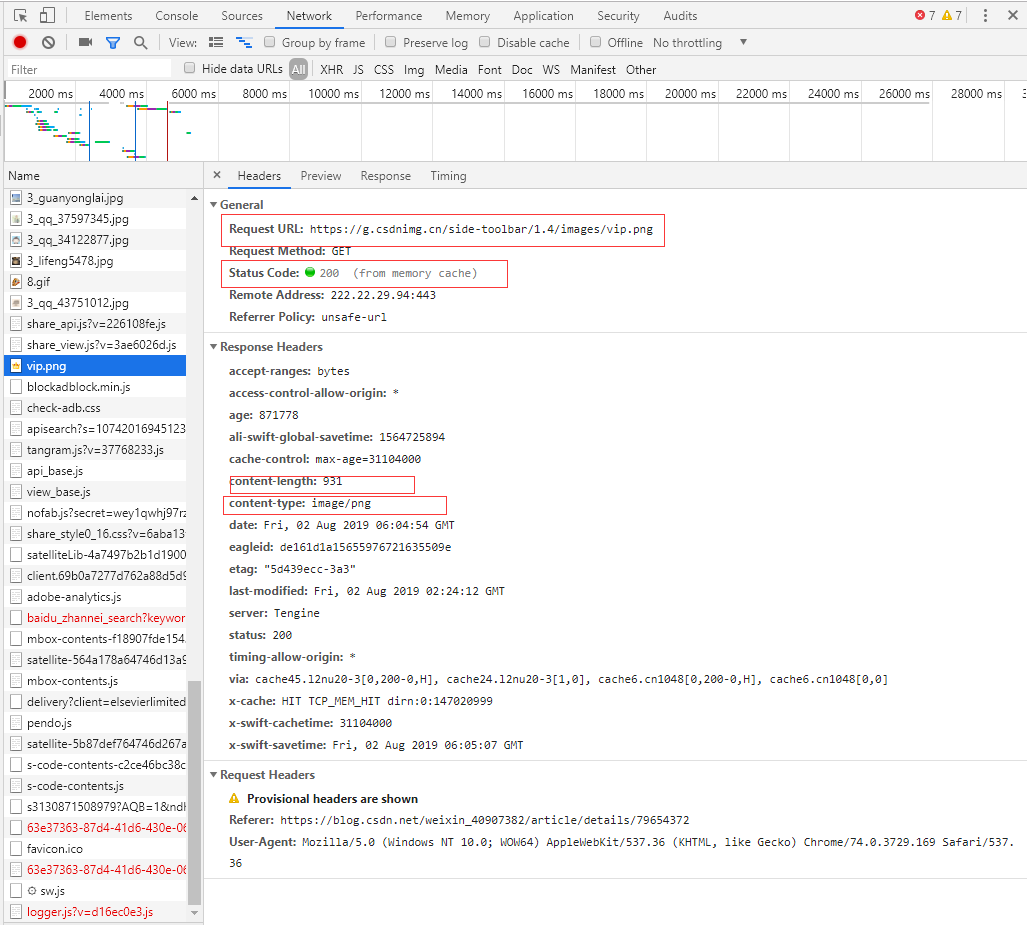

通过网页中图片的加载，可以看出HTTP请求的流程：
1. 浏览器向服务器发送http请求；
    - 方法：get/post，请求资源/附带用户数据
    - 路径：/full/url/path
    - 域名：由host头指定， 
    - 相关header
    - 如果方法为post，还应该包括用户Body，包含用户数据
2. 服务器向浏览器返回HTTP响应，响应包括：
    - 响应代码
        - 200：成功
        - 3xx：重定向
        - 4xx:请求错误
        - 5xx：服务器错误
    - 响应类型：Content type：image/text……
    - 其他header
    - Body，包含响应的内容，HTML源码在其中
3. 如果请求其他资源，继续步骤1，2.
            
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [52]:
import urllib
# import urllib2 # python3中没有 urllib2 用urllib.request替代

# get请求
resu = urllib.request.urlopen('https://hao.360.cn', data=None, timeout=10)
data = resu.read().decode()

#打开文件
fo = open('test.txt','a+',encoding = 'utf-8') # 打开文件 这里网络数据流的编码需要和写入的文件编码一致
fo.write(data)   # 写入文件
fo.close()       # 关闭文件